## Bias - Variance
### Explore bias-variance tradeoff visually
### See what overfitting looks like

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from warnings import filterwarnings
filterwarnings('ignore', message='.*')
import helper
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import numpy.random as npr
import numpy.linalg as nlg
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel 

In [2]:
%%capture
def generate_fit(n_data, degree):
    
    lbd = 0.00
    LB = 1
    UB = 4
    
    if degree >= n_data:
        print("Reducing degree to equal one less than the number of points!")
        degree = n_data - 1
    
    
    YNOISE = 0.3
    XNOISE = 0.0
    
    NVAL = 50
    
    def func(x):
        return np.log(x) + 0.5 * np.sin(3 * x) + x * 0.5
    
    def x_to_X(x):
        out = np.zeros((len(x), degree + 1))
        for i in range(degree + 1):
            out[:, i] = x ** i
        return out
    
    npr.seed(13371387)
    
    x_raw = np.linspace(LB, UB, num=NVAL) + npr.normal(scale=XNOISE, size=NVAL)
    y_raw = func(x_raw) + npr.normal(scale=YNOISE, size=NVAL)
    
    ixes = npr.permutation(NVAL)
    
    x = x_raw[ixes[:n_data]]
    y = y_raw[ixes[:n_data]]
    
    xv = np.linspace(LB, UB, num=NVAL) + npr.normal(scale=XNOISE, size=NVAL)
    yv = func(xv) + npr.normal(scale=YNOISE, size=NVAL)
    
    X = x_to_X(x)
    
    coef = nlg.inv(X.T @ X + lbd * n_data * np.eye(degree + 1)) @ X.T @ y
    
    x_fit = np.linspace(np.min(xv), np.max(xv), num=NVAL)
    X_fit = x_to_X(x_fit)
    y_fit = X_fit @ coef
    
    plt.cla()
    
    # training plot
    plt.subplot(1, 2, 1)
    plt.plot(x_fit, y_fit)
    plt.scatter(x, y)
    plt.ylim((0, 4))
    
    ytfit = X @ coef
    loss = np.mean((y - ytfit)**2)
    st2 = np.sum((y - np.mean(y))**2)
    rt2 = np.sum((y - ytfit)**2)
    plt.title(f"Train set: $R^2$ {1- rt2/st2:0.2f}")
    
    # validation plot
    plt.subplot(1, 2, 2)
    plt.plot(x_fit, y_fit)
    plt.scatter(xv, yv)
    plt.ylim((0, 4))

    Xv = x_to_X(xv)
    yvfit = Xv @ coef
    loss = np.mean((yv - yvfit)**2)
    sv2 = np.sum((yv - np.mean(yv))**2)
    rv2 = np.sum((yv - yvfit)**2)
    plt.title(f"Test set: $R^2$ {1 - rv2/sv2:0.2f}") 
    
    # epilogue
    plt.gcf().set_size_inches((14, 6))
    plt.show()
    
    return (1 - rt2/st2, 1 - rv2/sv2)

In [3]:
interact(generate_fit,
         n_data=widgets.IntSlider(min=2,max=30,step=1,value=10),
         degree=widgets.IntSlider(min=1,max=5,step=1,value=3))

interactive(children=(IntSlider(value=10, description='n_data', max=30, min=2), IntSlider(value=3, description…

<function __main__.generate_fit(n_data, degree)>

In [4]:
%%capture
npr.seed(13371544)
X, Y, LFUNC = helper.gen_planar_samples();

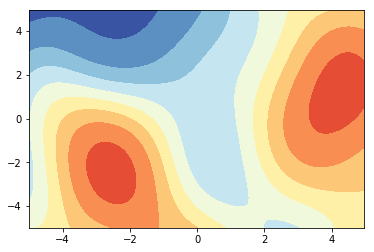

In [5]:
helper.plot_decision_surface(LFUNC)

In [6]:
%%capture
from sklearn.svm import SVC
def train_n_samples(n_data=10, degree=1, seed=1337):
    
    npr.seed(seed)
    
    x_t = X[:n_data]
    y_t = Y[:n_data]
    
    model = SVC(kernel='poly', degree=degree, probability=True).fit(x_t, y_t)
    
    x_red = x_t[y_t == 0]
    x_blue = x_t[y_t == 1]
    
    f = plt.figure()
    ax = plt.subplot(1, 3, 1)
    ax.scatter(x_red[:, 0], x_red[:, 1], color='red')
    ax.scatter(x_blue[:, 0], x_blue[:, 1], color='blue')
    
    ax=plt.subplot(1, 3, 2)
    helper.plot_decision_surface(model.predict_proba)
    
    ax=plt.subplot(1, 3, 3)
    helper.plot_decision_surface(LFUNC)
    
    plt.gcf().set_size_inches((15, 6))
    
    return x_t, y_t, model

In [7]:
interact(train_n_samples,
         n_data=widgets.IntSlider(min=5,max=30,step=1,value=10),
         degree=widgets.IntSlider(min=1,max=10,step=1,value=3),
         seed=widgets.IntText(value=1337))

interactive(children=(IntSlider(value=10, description='n_data', max=30, min=2), IntSlider(value=3, description…

<function __main__.train_n_samples(n_data=10, degree=1, seed=1337)>